Processing file for year 2001: 07200110.bpd
Year 2001: Volume = 164.10 cubic yards, Beach Width = 650.00 feet
Processing file for year 2002: 07200211.bpd
Year 2002: Volume = 166.33 cubic yards, Beach Width = 565.90 feet
Processing file for year 2003: 07200310.bpd
Year 2003: Volume = 179.27 cubic yards, Beach Width = 525.00 feet
Processing file for year 2004: 07200410.bpd
Year 2004: Volume = 172.70 cubic yards, Beach Width = 537.90 feet
Processing file for year 2005: 07200510.bpd
Year 2005: Volume = 147.89 cubic yards, Beach Width = 516.70 feet
Processing file for year 2006: 07200610.bpd
Year 2006: Volume = 156.19 cubic yards, Beach Width = 538.20 feet
Processing file for year 2007: 07200710.bpd
Year 2007: Volume = 151.11 cubic yards, Beach Width = 422.20 feet
Processing file for year 2008: 07200810.bpd
Year 2008: Volume = 162.12 cubic yards, Beach Width = 474.30 feet
Processing file for year 2009: 07200910.bpd
Year 2009: Volume = 164.71 cubic yards, Beach Width = 474.90 feet
Processing

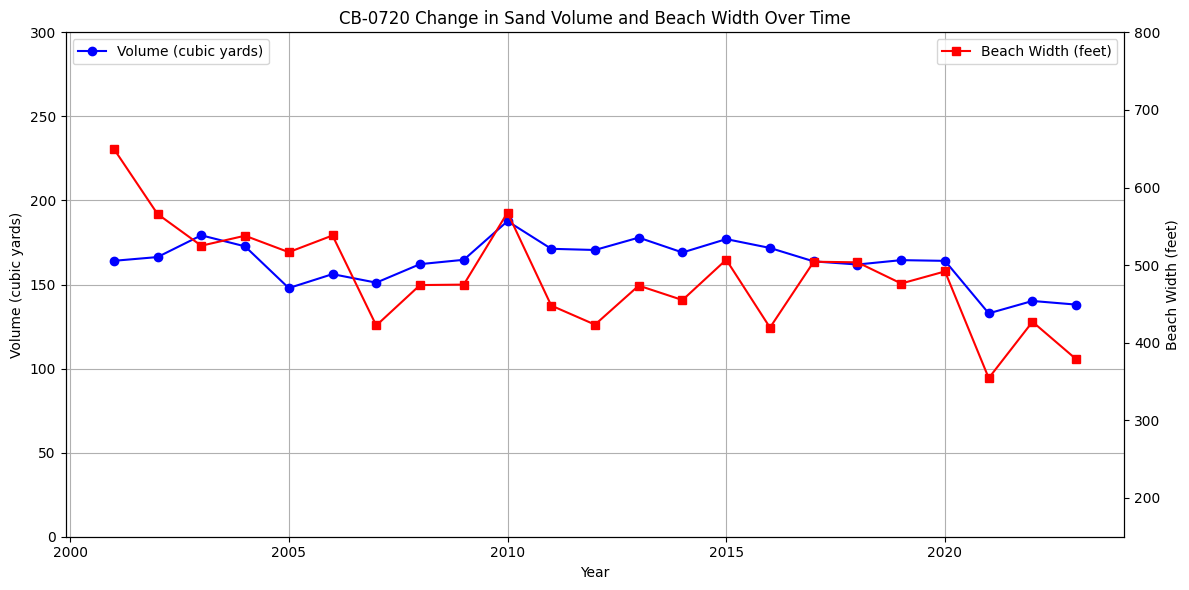

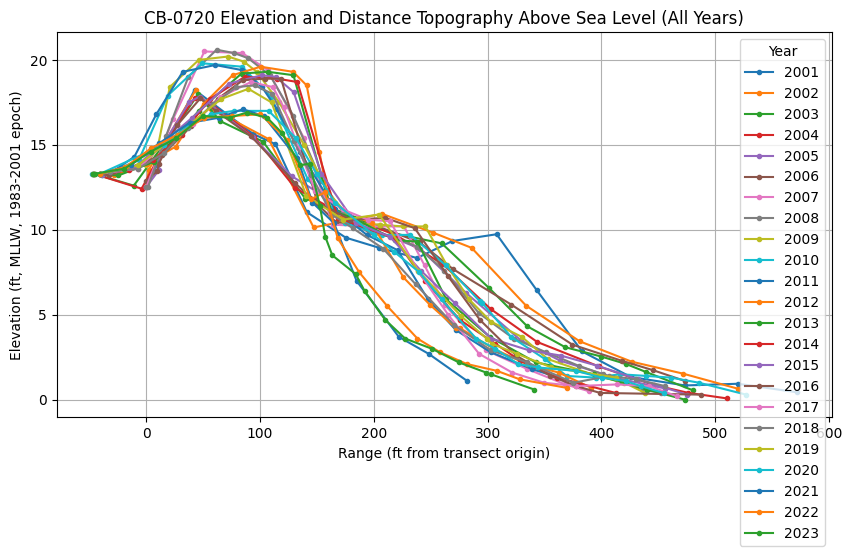

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume
def process_bpd_file(filename):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out negative elevation values
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] >= 0]

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits sea level
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= 0].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Create an empty list to store DataFrame, filtered DataFrame, volume, and beach width tuples
data_list = []

# Process each BPD file and calculate volumes
file_list = ['07200110.bpd', '07200211.bpd', '07200310.bpd', '07200410.bpd', '07200510.bpd', '07200610.bpd', '07200710.bpd', '07200810.bpd', '07200910.bpd', '07201010.bpd', '07201110.bpd', '07201212.bpd', '07201310.bpd', '07201410.bpd', '07201510.bpd', '07201610.bpd', '07201710.bpd', '07201810.bpd', '07201910.bpd', '07202010.bpd', '07202110.bpd', '07202210.bpd', '07202310.bpd']

for year, filename in enumerate(file_list, start=2001):
    print(f"Processing file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        data_list.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year}: Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame from collected data
volumes_df = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Calculate deltas (change from previous year)
volumes_df['Delta Volume (cubic yards)'] = volumes_df['Volume (cubic yards)'].diff()

# Display volumes, beach width, and deltas as a table
print("Volumes, Beach Width, and Delta Volumes Over Time:")
print(volumes_df)

# Plotting the volumes and beach width over time
plt.figure(figsize=(12, 6))

# Plot 1: Volume (left y-axis)
plt.plot(volumes_df['Year'], volumes_df['Volume (cubic yards)'], marker='o', color='b', label='Volume (cubic yards)')
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 300)
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='upper left')

# Create a secondary y-axis for beach width
plt.twinx()

# Plot 2: Beach Width (right y-axis)
plt.plot(volumes_df['Year'], volumes_df['Beach Width (feet)'], marker='s', color='r', label='Beach Width (feet)')
plt.ylabel('Beach Width (feet)')
plt.ylim(150, 800)
plt.legend(loc='upper right')

# Title and layout adjustments
plt.title('CB-0720 Change in Sand Volume and Beach Width Over Time')
plt.tight_layout()
plt.show()

# Plotting the elevation and distance topography above sea level for all years on one graph
plt.figure(figsize=(10, 5))

for year, df_filtered in zip(volumes_df['Year'], volumes_df['Filtered DataFrame']):
    plt.plot(df_filtered['Range (ft from transect origin)'], df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'], marker='.', label=f'{year}')

plt.title('CB-0720 Elevation and Distance Topography Above Sea Level (All Years)')
plt.xlabel('Range (ft from transect origin)')
plt.ylabel('Elevation (ft, MLLW, 1983-2001 epoch)')
plt.grid(True)
plt.legend(title='Year')
plt.show()


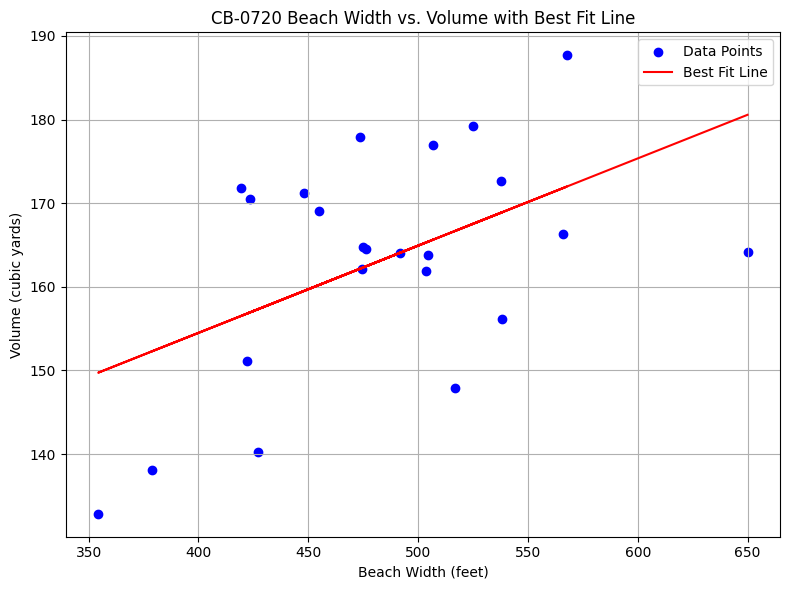

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Beach Width vs. Volume
plt.figure(figsize=(8, 6))
plt.scatter(volumes_df['Beach Width (feet)'], volumes_df['Volume (cubic yards)'], color='blue', label='Data Points')

# Calculate the line of best fit
m, b = np.polyfit(volumes_df['Beach Width (feet)'].dropna(), volumes_df['Volume (cubic yards)'].dropna(), 1)
plt.plot(volumes_df['Beach Width (feet)'], m * volumes_df['Beach Width (feet)'] + b, color='red', label=f'Best Fit Line')

# Labeling the plot
plt.title('CB-0720 Beach Width vs. Volume with Best Fit Line')
plt.xlabel('Beach Width (feet)')
plt.ylabel('Volume (cubic yards)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Processing file for year 2001 in CB-0720: 07200110.bpd
Year 2001 (CB-0720): Volume = 164.10 cubic yards, Beach Width = 650.00 feet
Processing file for year 2002 in CB-0720: 07200211.bpd
Year 2002 (CB-0720): Volume = 166.33 cubic yards, Beach Width = 565.90 feet
Processing file for year 2003 in CB-0720: 07200310.bpd
Year 2003 (CB-0720): Volume = 179.27 cubic yards, Beach Width = 525.00 feet
Processing file for year 2004 in CB-0720: 07200410.bpd
Year 2004 (CB-0720): Volume = 172.70 cubic yards, Beach Width = 537.90 feet
Processing file for year 2005 in CB-0720: 07200510.bpd
Year 2005 (CB-0720): Volume = 147.89 cubic yards, Beach Width = 516.70 feet
Processing file for year 2006 in CB-0720: 07200610.bpd
Year 2006 (CB-0720): Volume = 156.19 cubic yards, Beach Width = 538.20 feet
Processing file for year 2007 in CB-0720: 07200710.bpd
Year 2007 (CB-0720): Volume = 151.11 cubic yards, Beach Width = 422.20 feet
Processing file for year 2008 in CB-0720: 07200810.bpd
Year 2008 (CB-0720): Volume 

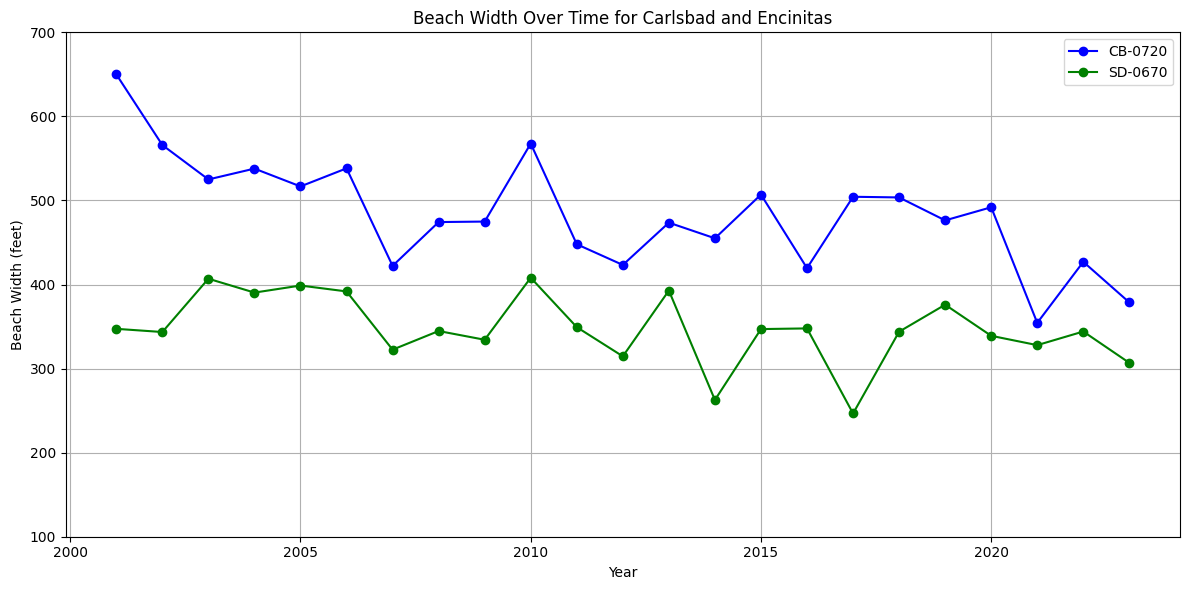

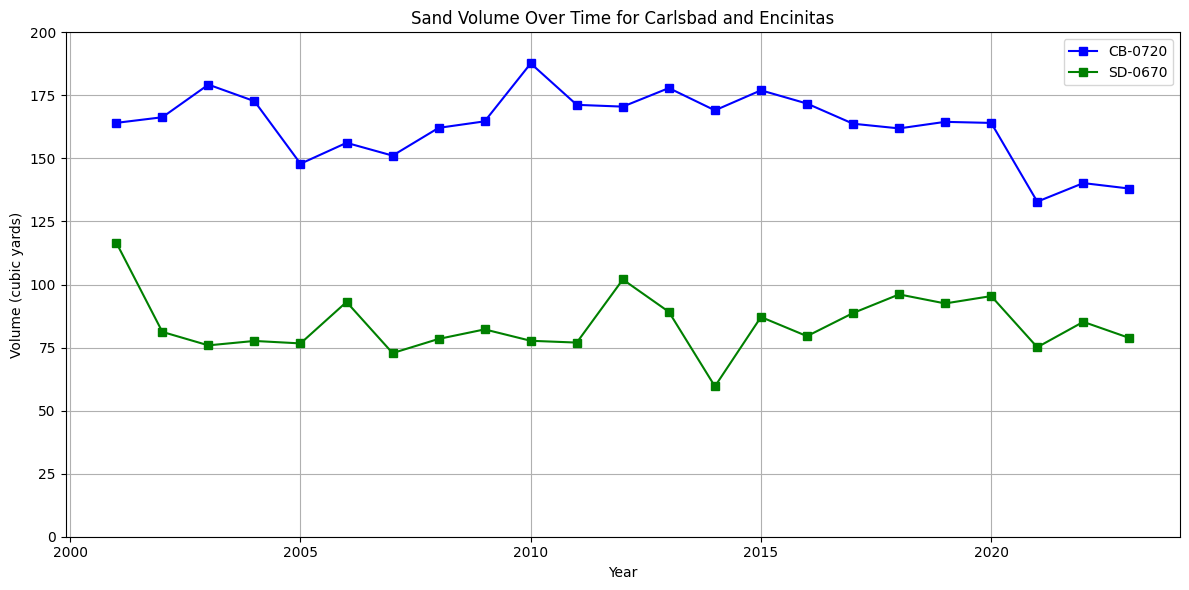

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume
def process_bpd_file(filename):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out negative elevation values
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] >= 0]

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits sea level
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= 0].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Define file lists for each transect
transect_files = {
    'CB-0720': ['07200110.bpd', '07200211.bpd', '07200310.bpd', '07200410.bpd', '07200510.bpd', '07200610.bpd', '07200710.bpd', '07200810.bpd', '07200910.bpd', '07201010.bpd', '07201110.bpd', '07201212.bpd', '07201310.bpd', '07201410.bpd', '07201510.bpd', '07201610.bpd', '07201710.bpd', '07201810.bpd', '07201910.bpd', '07202010.bpd', '07202110.bpd', '07202210.bpd', '07202310.bpd'],
    'SD-0670': ['06700110.bpd', '06700211.bpd', '06700310.bpd', '06700410.bpd', '06700510.bpd', '06700610.bpd', '06700710.bpd', '06700810.bpd', '06700910.bpd', '06701010.bpd', '06701110.bpd', '06701212.bpd', '06701310.bpd', '06701410.bpd', '06701510.bpd', '06701610.bpd', '06701710.bpd', '06701810.bpd', '06701910.bpd', '06702010.bpd', '06702110.bpd', '06702210.bpd', '06702310.bpd']
}

# Custom names for the transects
transect_names = {
    'CB-0720': 'CB-0720',
    'SD-0670': 'SD-0670'
}

# Process data for each transect
transect_data = {}

for transect, files in transect_files.items():
    data_list = []
    for year, filename in enumerate(files, start=2001):
        print(f"Processing file for year {year} in {transect}: {filename}")
        df, df_filtered, volume, beach_width = process_bpd_file(filename)
        if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
            data_list.append((year, volume, beach_width, df, df_filtered))
            print(f"Year {year} ({transect}): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
        else:
            print(f"Skipping year {year} in {transect} due to error in file processing")
    
    # Create DataFrame from collected data
    transect_data[transect] = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Plotting the beach width over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    color = 'blue' if transect == 'CB-0720' else 'green'
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', label=transect_names[transect], color=color)
plt.ylabel('Beach Width (feet)')
plt.ylim(100, 700)
plt.xlabel('Year')
plt.title('Beach Width Over Time for Carlsbad and Encinitas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the volume over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    color = 'blue' if transect == 'CB-0720' else 'green'
    plt.plot(data['Year'], data['Volume (cubic yards)'], marker='s', label=transect_names[transect], color=color)
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 200)
plt.xlabel('Year')
plt.title('Sand Volume Over Time for Carlsbad and Encinitas')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Processing file for year 2001 in SD-0710: 07100110.bpd
Year 2001 (SD-0710): Volume = 80.21 cubic yards, Beach Width = 279.10 feet
Processing file for year 2002 in SD-0710: 07100211.bpd
Year 2002 (SD-0710): Volume = 59.92 cubic yards, Beach Width = 258.90 feet
Processing file for year 2003 in SD-0710: 07100310.bpd
Year 2003 (SD-0710): Volume = 52.16 cubic yards, Beach Width = 259.40 feet
Processing file for year 2004 in SD-0710: 07100410.bpd
Year 2004 (SD-0710): Volume = 43.67 cubic yards, Beach Width = 264.40 feet
Processing file for year 2005 in SD-0710: 07100510.bpd
Year 2005 (SD-0710): Volume = 37.64 cubic yards, Beach Width = 188.60 feet
Processing file for year 2006 in SD-0710: 07100610.bpd
Year 2006 (SD-0710): Volume = 48.81 cubic yards, Beach Width = 253.20 feet
Processing file for year 2007 in SD-0710: 07100710.bpd
Year 2007 (SD-0710): Volume = 35.92 cubic yards, Beach Width = 174.90 feet
Processing file for year 2008 in SD-0710: 07100810.bpd
Year 2008 (SD-0710): Volume = 38.93

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

Year 2012 (SD-0700): Volume = 11.71 cubic yards, Beach Width = 83.80 feet
Processing file for year 2013 in SD-0700: 07001310.bpd
Year 2013 (SD-0700): Volume = 19.91 cubic yards, Beach Width = 166.20 feet
Processing file for year 2014 in SD-0700: 07001410.bpd
Year 2014 (SD-0700): Volume = 11.78 cubic yards, Beach Width = 86.20 feet
Processing file for year 2015 in SD-0700: 07001510.bpd
Year 2015 (SD-0700): Volume = 11.18 cubic yards, Beach Width = 102.30 feet
Processing file for year 2016 in SD-0700: 07001610.bpd
Year 2016 (SD-0700): Volume = 6.21 cubic yards, Beach Width = 75.20 feet
Processing file for year 2017 in SD-0700: 07001710.bpd
Year 2017 (SD-0700): Volume = 3.58 cubic yards, Beach Width = 68.30 feet
Processing file for year 2018 in SD-0700: 07001810.bpd
Year 2018 (SD-0700): Volume = 5.62 cubic yards, Beach Width = 73.60 feet
Processing file for year 2019 in SD-0700: 07001910.bpd
Year 2019 (SD-0700): Volume = 8.87 cubic yards, Beach Width = 90.60 feet
Processing file for year 

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

Year 2012 (SD-0690): Volume = 9.58 cubic yards, Beach Width = 117.30 feet
Processing file for year 2013 in SD-0690: 06901310.bpd
Year 2013 (SD-0690): Volume = 16.98 cubic yards, Beach Width = 141.40 feet
Processing file for year 2014 in SD-0690: 06901410.bpd
Year 2014 (SD-0690): Volume = 18.62 cubic yards, Beach Width = 115.80 feet
Processing file for year 2015 in SD-0690: 06901510.bpd
Year 2015 (SD-0690): Volume = 8.20 cubic yards, Beach Width = 87.20 feet
Processing file for year 2016 in SD-0690: 06901610.bpd
Year 2016 (SD-0690): Volume = 4.63 cubic yards, Beach Width = 96.60 feet
Processing file for year 2001 in SD-0680: 06800110.bpd
Year 2001 (SD-0680): Volume = 25.97 cubic yards, Beach Width = 221.20 feet
Processing file for year 2002 in SD-0680: 06800211.bpd
Year 2002 (SD-0680): Volume = 34.19 cubic yards, Beach Width = 199.60 feet
Processing file for year 2003 in SD-0680: 06800310.bpd
Year 2003 (SD-0680): Volume = 37.32 cubic yards, Beach Width = 219.60 feet
Processing file for 

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/3309731505.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

Year 2019 (SD-0675): Volume = 16.53 cubic yards, Beach Width = 149.80 feet
Processing file for year 2020 in SD-0675: 06752010.bpd
Year 2020 (SD-0675): Volume = 16.42 cubic yards, Beach Width = 204.80 feet
Processing file for year 2021 in SD-0675: 06752110.bpd
Year 2021 (SD-0675): Volume = 6.28 cubic yards, Beach Width = 100.50 feet
Processing file for year 2022 in SD-0675: 06752210.bpd
Year 2022 (SD-0675): Volume = 9.83 cubic yards, Beach Width = 132.10 feet
Processing file for year 2023 in SD-0675: 06752310.bpd
Year 2023 (SD-0675): Volume = 6.12 cubic yards, Beach Width = 68.90 feet


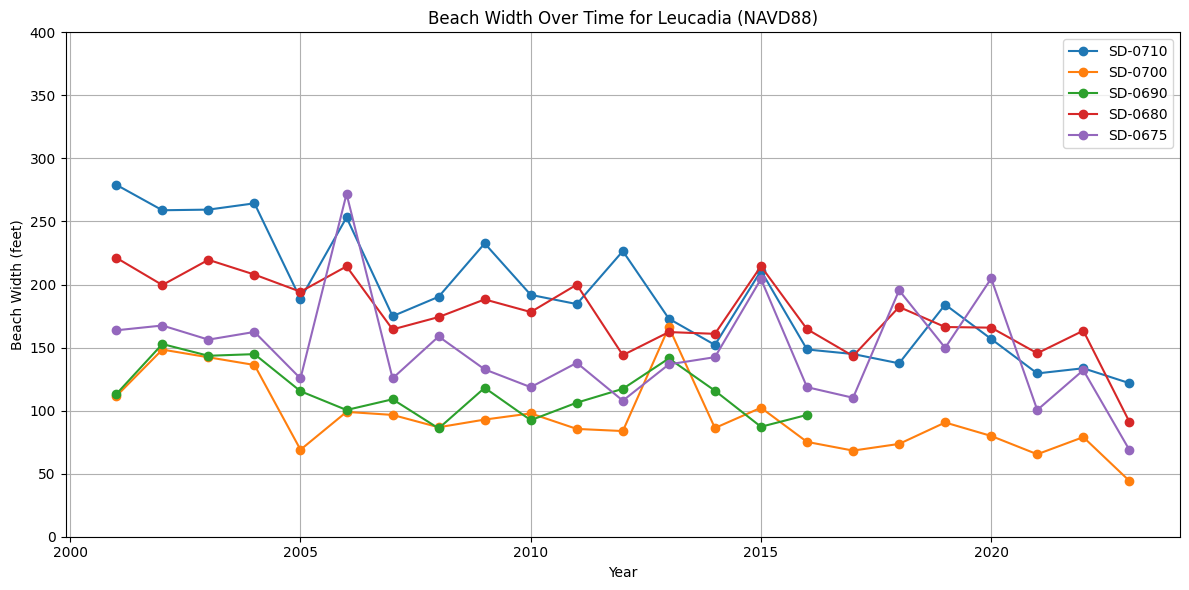

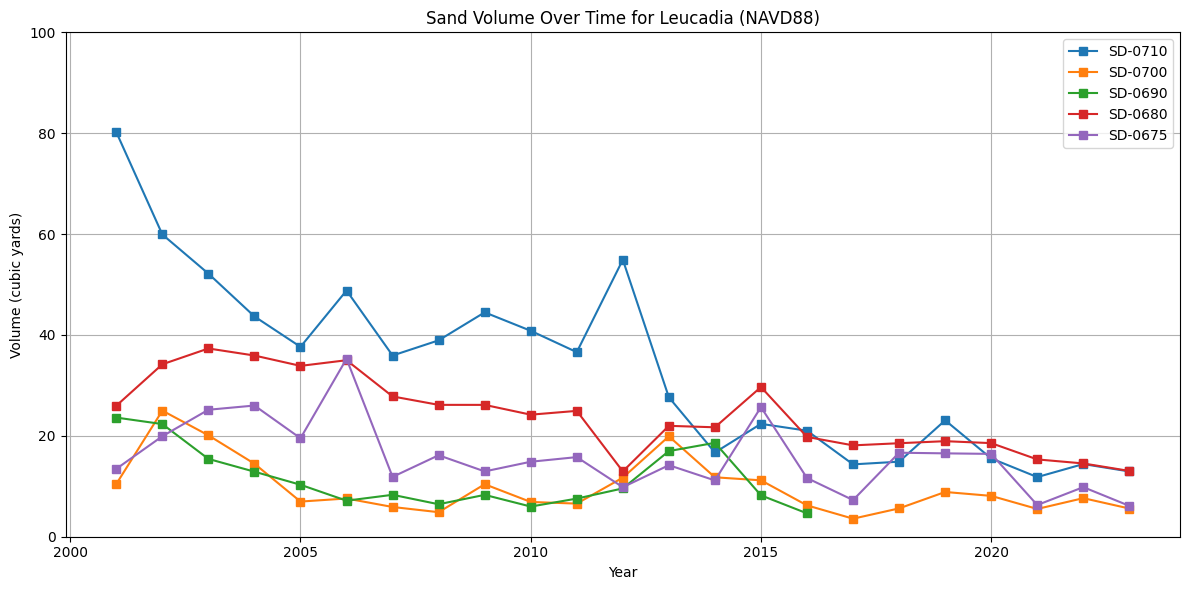

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume based on NAVD88
def process_bpd_file_navd(filename, navd_threshold=2.22):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out data below the NAVD88 threshold (2.22 feet)
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] > navd_threshold]

        # Adjust elevations to reference NAVD88 (not strictly necessary for volume but for interpretation)
        df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, NAVD88)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits the NAVD88 threshold
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= navd_threshold].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Define file lists for each transect
transect_files = {
    'SD-0710': ['07100110.bpd', '07100211.bpd', '07100310.bpd', '07100410.bpd', '07100510.bpd', '07100610.bpd', '07100710.bpd', '07100810.bpd', '07100910.bpd', '07101010.BPD', '07101110.bpd', '07101212.bpd', '07101310.bpd', '07101410.bpd', '07101510.bpd', '07101610.bpd', '07101710.bpd', '07101810.bpd', '07101910.bpd', '07102010.bpd', '07102110.bpd', '07102210.bpd', '07102310.bpd'],
    'SD-0700': ['07000110.bpd','07000211.bpd', '07000310.bpd', '07000410.bpd', '07000510.bpd', '07000610.bpd', '07000710.bpd', '07000810.bpd', '07000910.bpd', '07001010.BPD', '07001110.bpd','07001212.bpd', '07001310.bpd', '07001410.bpd', '07001510.bpd', '07001610.bpd', '07001710.bpd', '07001810.bpd', '07001910.bpd', '07002010.bpd', '07002110.bpd', '07002210.bpd', '07002310.bpd'],
    'SD-0690': ['06900110.bpd', '06900211.bpd', '06900310.bpd', '06900410.bpd', '06900510.bpd', '06900610.bpd', '06900710.bpd', '06900810.bpd', '06900910.bpd', '06901010.BPD', '06901110.bpd', '06901212.bpd', '06901310.bpd', '06901410.bpd', '06901510.bpd', '06901610.bpd'],
    'SD-0680': ['06800110.bpd','06800211.bpd', '06800310.bpd', '06800410.bpd', '06800510.bpd', '06800610.bpd', '06800710.bpd', '06800810.bpd', '06800910.bpd', '06801010.BPD', '06801110.bpd','06801212.bpd', '06801310.bpd', '06801410.bpd', '06801510.bpd', '06801610.bpd', '06801710.bpd', '06801810.bpd', '06801910.bpd', '06802010.bpd', '06802110.bpd', '06802210.bpd', '06802310.bpd'],
    'SD-0675': ['06750110.bpd', '06750211.bpd', '06750310.bpd', '06750410.bpd', '06750510.bpd', '06750610.bpd', '06750710.bpd', '06750810.bpd', '06750910.bpd', '06751010.BPD', '06751110.bpd', '06751212.bpd', '06751310.bpd', '06751410.bpd', '06751510.bpd', '06751610.bpd', '06751710.bpd', '06751810.bpd', '06751910.bpd', '06752010.bpd', '06752110.bpd', '06752210.bpd', '06752310.bpd']
}

# Custom names for the transects
transect_names = {
    'SD-0710': 'SD-0710',
    'SD-0700': 'SD-0700',
    'SD-0690': 'SD-0690',
    'SD-0680': 'SD-0680',
    'SD-0675': 'SD-0675'
}

# Process data for each transect
transect_data = {}

for transect, files in transect_files.items():
    data_list = []
    for year, filename in enumerate(files, start=2001):
        print(f"Processing file for year {year} in {transect}: {filename}")
        df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
        if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
            data_list.append((year, volume, beach_width, df, df_filtered))
            print(f"Year {year} ({transect}): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
        else:
            print(f"Skipping year {year} in {transect} due to error in file processing")
    
    # Create DataFrame from collected data
    transect_data[transect] = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Plotting the beach width over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', label=transect_names[transect])
plt.ylabel('Beach Width (feet)')
plt.ylim(0, 400)
plt.xlabel('Year')
plt.title('Beach Width Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the volume over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Volume (cubic yards)'], marker='s', label=transect_names[transect])
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 100)
plt.xlabel('Year')
plt.title('Sand Volume Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


SD-0710: Slope = -6.14, Intercept = 12541.90, P-Value = 0.0000
Mean Beach Width = 191.17 feet, Standard Deviation = 47.42 feet

SD-0700: Slope = -2.65, Intercept = 5421.25, P-Value = 0.0018
Mean Beach Width = 94.82 feet, Standard Deviation = 28.56 feet

SD-0690: Slope = -2.07, Intercept = 4282.35, P-Value = 0.0664
Mean Beach Width = 115.01 feet, Standard Deviation = 20.37 feet

SD-0680: Slope = -3.28, Intercept = 6781.59, P-Value = 0.0001
Mean Beach Width = 176.78 feet, Standard Deviation = 30.08 feet

SD-0675: Slope = -1.80, Intercept = 3775.86, P-Value = 0.1848
Mean Beach Width = 147.50 feet, Standard Deviation = 41.73 feet



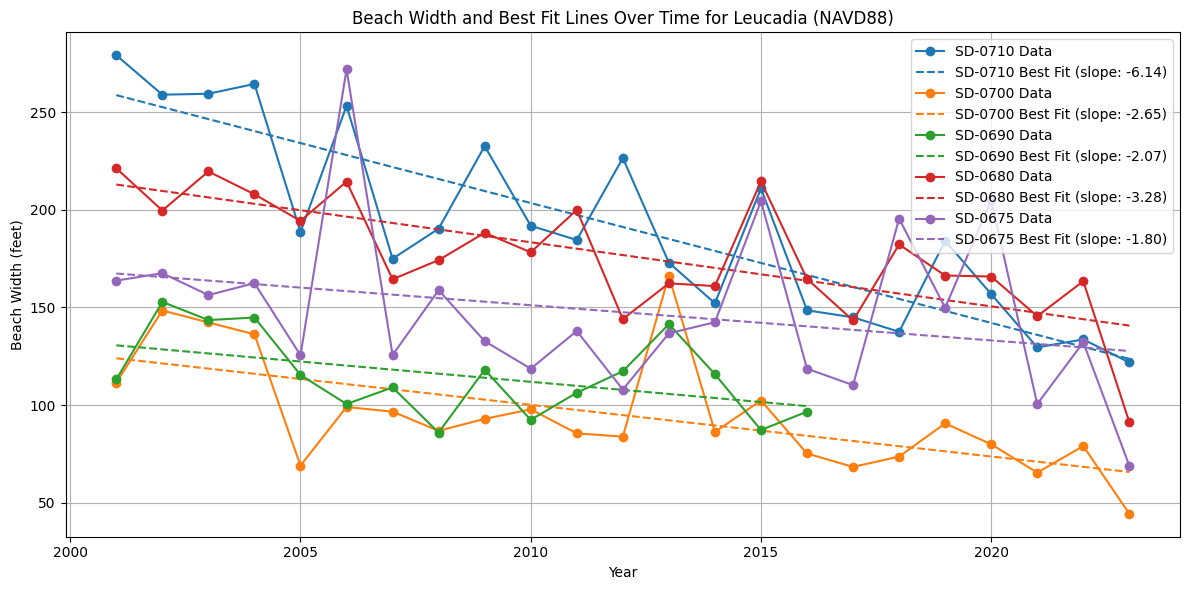

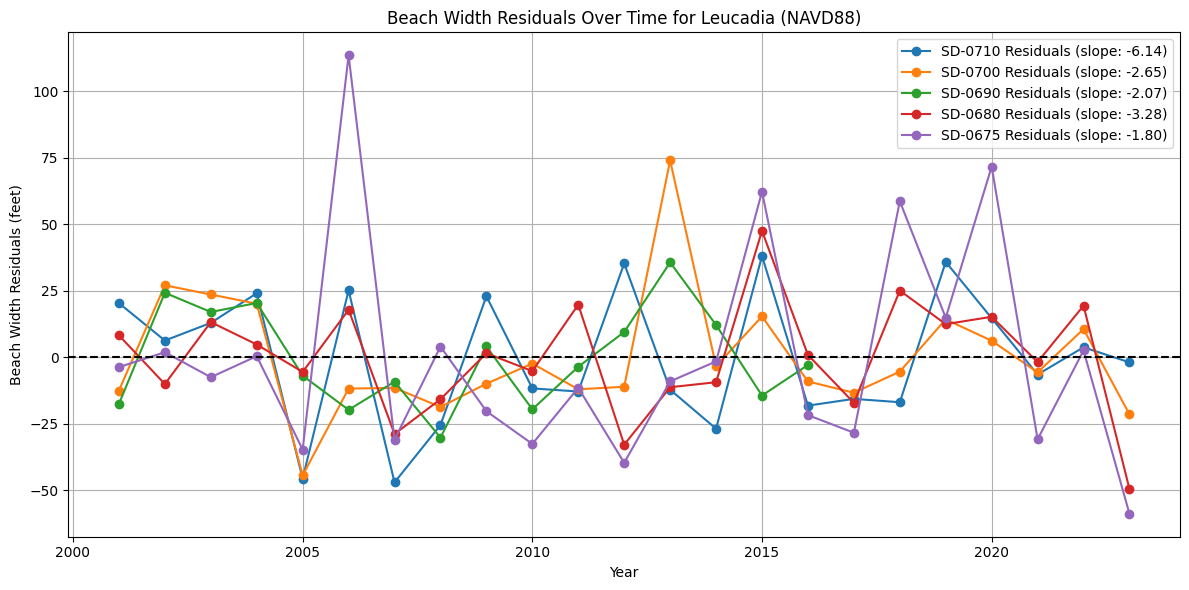

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, ttest_1samp

# Function to fit a line of best fit, calculate residuals, p-value, mean, and standard deviation
def analyze_transect_data(data):
    years = data['Year'].values
    widths = data['Beach Width (feet)'].values

    # Fit a line of best fit for beach width
    slope_width, intercept_width, r_value, p_value, std_err = linregress(years, widths)
    best_fit_width = slope_width * years + intercept_width
    residuals_width = widths - best_fit_width

    # Calculate mean and standard deviation of beach width
    mean_width = np.mean(widths)
    std_dev_width = np.std(widths)

    return residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width

# Initialize a dictionary to store analysis results for all transects
transect_analysis_results = {}

# Analyzing each transect
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    
    # Storing the results
    transect_analysis_results[transect] = {
        "Slope": slope_width,
        "Intercept": intercept_width,
        "P-Value": p_value,
        "Mean Beach Width": mean_width,
        "Standard Deviation": std_dev_width
    }

    # Displaying the results
    print(f"{transect_names[transect]}: Slope = {slope_width:.2f}, Intercept = {intercept_width:.2f}, P-Value = {p_value:.4f}")
    print(f"Mean Beach Width = {mean_width:.2f} feet, Standard Deviation = {std_dev_width:.2f} feet\n")

# Optional: Plotting the original beach width data and lines of best fit for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', linestyle='-', label=f"{transect_names[transect]} Data")
    plt.plot(data['Year'], best_fit_width, linestyle='--', color=plt.gca().lines[-1].get_color(), label=f"{transect_names[transect]} Best Fit (slope: {slope_width:.2f})")

plt.ylabel('Beach Width (feet)')
plt.xlabel('Year')
plt.title('Beach Width and Best Fit Lines Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the beach width residuals over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], residuals_width, marker='o', label=f"{transect_names[transect]} Residuals (slope: {slope_width:.2f})")

plt.ylabel('Beach Width Residuals (feet)')
plt.xlabel('Year')
plt.title('Beach Width Residuals Over Time for Leucadia (NAVD88)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Processing file for year 2012 in CB-0720: 07201212.bpd
Year 2012 (CB-0720): Volume = 135.71 cubic yards, Beach Width = 334.20 feet
Processing file for year 2013 in CB-0720: 07201310.bpd
Year 2013 (CB-0720): Volume = 139.15 cubic yards, Beach Width = 342.20 feet
Processing file for year 2014 in CB-0720: 07201410.bpd
Year 2014 (CB-0720): Volume = 134.94 cubic yards, Beach Width = 361.10 feet
Processing file for year 2015 in CB-0720: 07201510.bpd
Year 2015 (CB-0720): Volume = 137.69 cubic yards, Beach Width = 396.40 feet
Processing file for year 2016 in CB-0720: 07201610.bpd
Year 2016 (CB-0720): Volume = 136.94 cubic yards, Beach Width = 355.20 feet
Processing file for year 2017 in CB-0720: 07201710.bpd
Year 2017 (CB-0720): Volume = 129.31 cubic yards, Beach Width = 321.50 feet
Processing file for year 2018 in CB-0720: 07201810.bpd
Year 2018 (CB-0720): Volume = 124.79 cubic yards, Beach Width = 334.60 feet
Processing file for year 2019 in CB-0720: 07201910.bpd
Year 2019 (CB-0720): Volume 

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/1319753591.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/1319753591.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

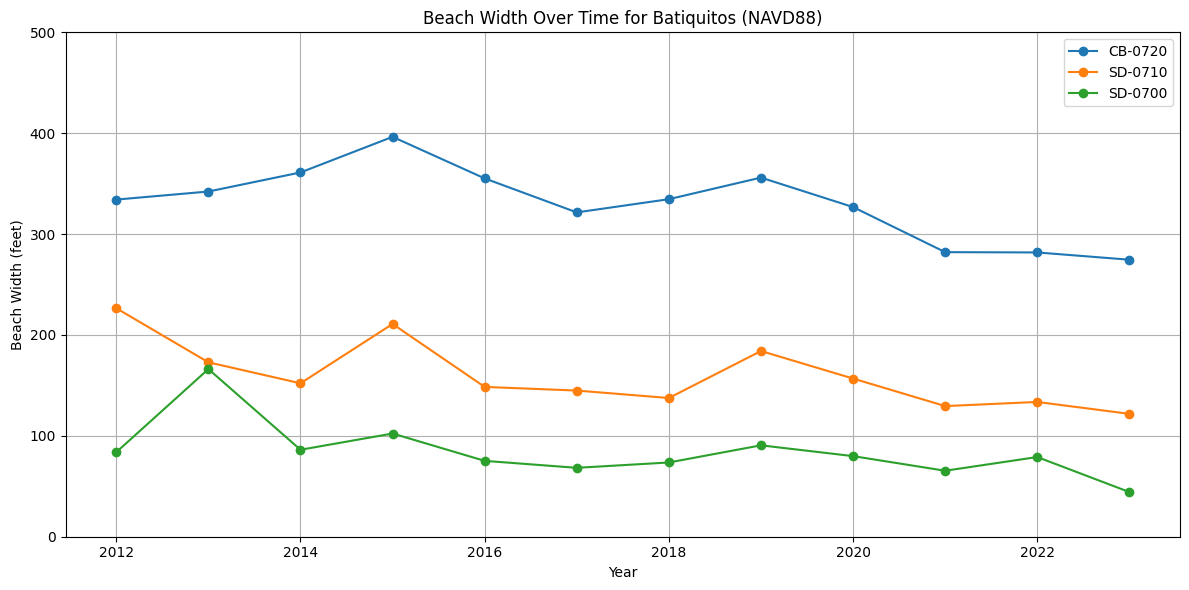

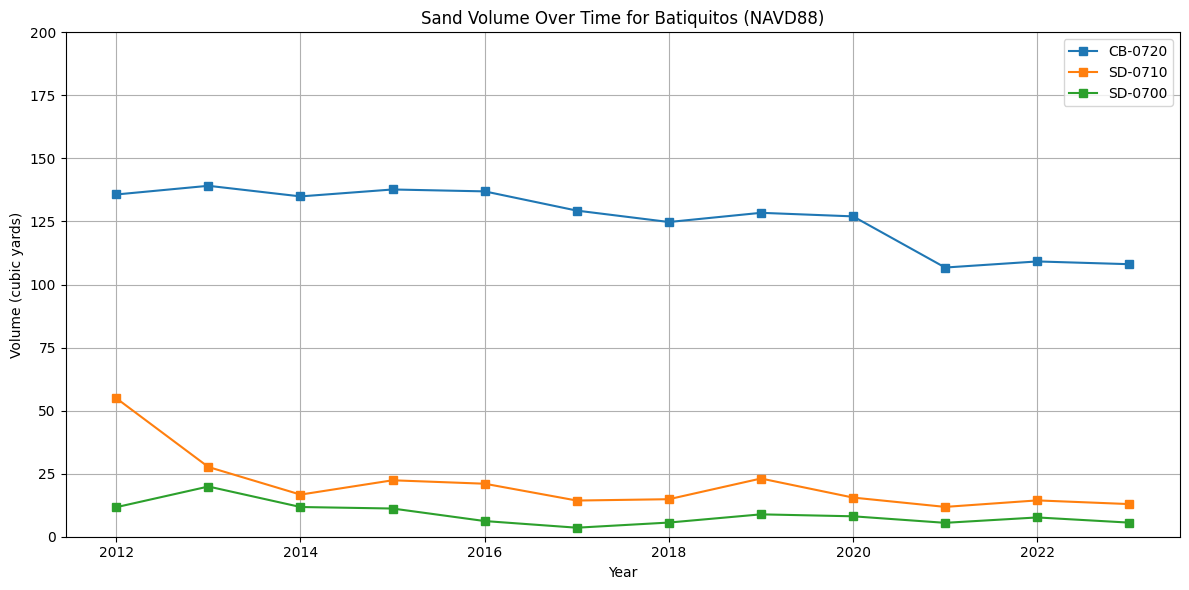

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume based on NAVD88
def process_bpd_file_navd(filename, navd_threshold=2.22):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out data below the NAVD88 threshold (2.22 feet)
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] > navd_threshold]

        # Adjust elevations to reference NAVD88 (not strictly necessary for volume but for interpretation)
        df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, NAVD88)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits the NAVD88 threshold
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= navd_threshold].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Define file lists for each transect
transect_files = {
    'CB-0720': ['07201212.bpd', '07201310.bpd', '07201410.bpd', '07201510.bpd', '07201610.bpd', '07201710.bpd', '07201810.bpd', '07201910.bpd', '07202010.bpd', '07202110.bpd', '07202210.bpd', '07202310.bpd'],
    'SD-0710': [ '07101212.bpd', '07101310.bpd', '07101410.bpd', '07101510.bpd', '07101610.bpd', '07101710.bpd', '07101810.bpd', '07101910.bpd', '07102010.bpd', '07102110.bpd', '07102210.bpd', '07102310.bpd'],
    'SD-0700': ['07001212.bpd', '07001310.bpd', '07001410.bpd', '07001510.bpd', '07001610.bpd', '07001710.bpd', '07001810.bpd', '07001910.bpd', '07002010.bpd', '07002110.bpd', '07002210.bpd', '07002310.bpd']
}

# Custom names for the transects
transect_names = {
    'CB-0720': 'CB-0720',
    'SD-0710': 'SD-0710',
    'SD-0700': 'SD-0700'
}

# Process data for each transect
transect_data = {}

for transect, files in transect_files.items():
    data_list = []
    for year, filename in enumerate(files, start=2012):
        print(f"Processing file for year {year} in {transect}: {filename}")
        df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
        if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
            data_list.append((year, volume, beach_width, df, df_filtered))
            print(f"Year {year} ({transect}): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
        else:
            print(f"Skipping year {year} in {transect} due to error in file processing")
    
    # Create DataFrame from collected data
    transect_data[transect] = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Plotting the beach width over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', label=transect_names[transect])
plt.ylabel('Beach Width (feet)')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.title('Beach Width Over Time for Batiquitos (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the volume over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Volume (cubic yards)'], marker='s', label=transect_names[transect])
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 200)
plt.xlabel('Year')
plt.title('Sand Volume Over Time for Batiquitos (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


CB-0720: Slope = -7.29, Intercept = 15036.42, P-Value = 0.0082
Mean Beach Width = 330.54 feet, Standard Deviation = 34.93 feet

SD-0710: Slope = -6.42, Intercept = 13102.26, P-Value = 0.0102
Mean Beach Width = 159.92 feet, Standard Deviation = 31.34 feet

SD-0700: Slope = -4.98, Intercept = 10139.62, P-Value = 0.0350
Mean Beach Width = 84.57 feet, Standard Deviation = 28.18 feet



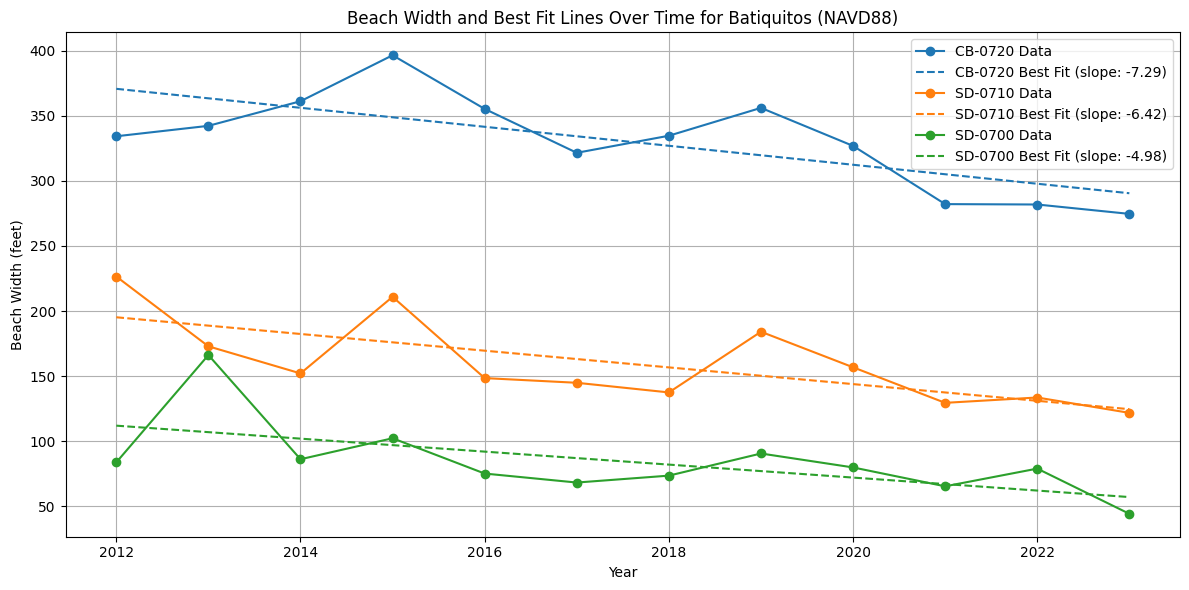

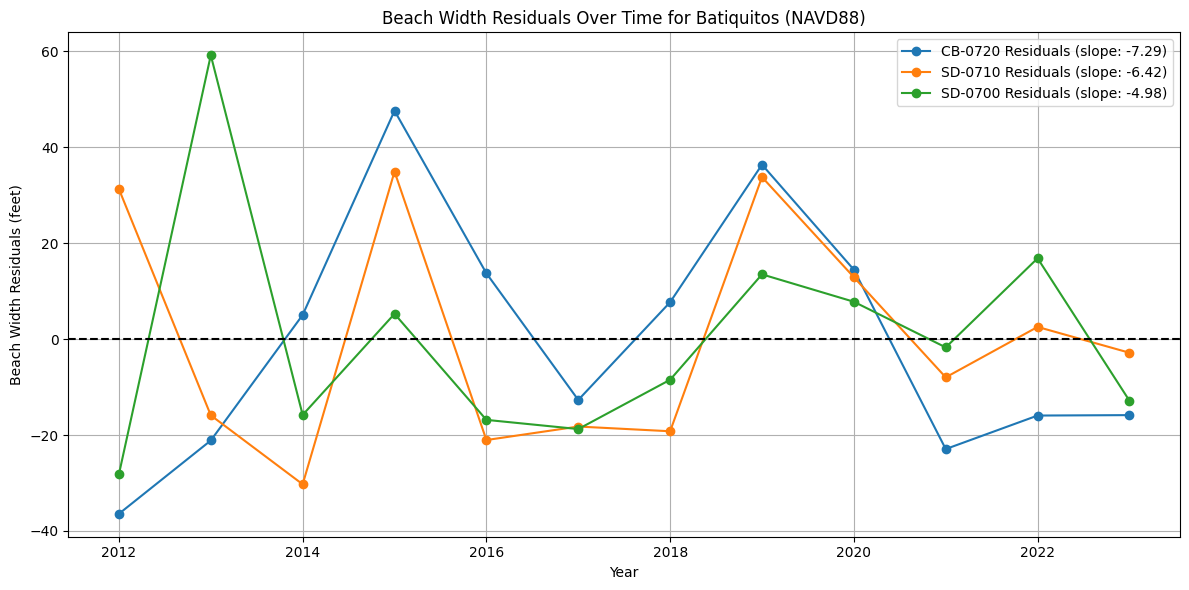

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, ttest_1samp

# Function to fit a line of best fit, calculate residuals, p-value, mean, and standard deviation
def analyze_transect_data(data):
    years = data['Year'].values
    widths = data['Beach Width (feet)'].values

    # Fit a line of best fit for beach width
    slope_width, intercept_width, r_value, p_value, std_err = linregress(years, widths)
    best_fit_width = slope_width * years + intercept_width
    residuals_width = widths - best_fit_width

    # Calculate mean and standard deviation of beach width
    mean_width = np.mean(widths)
    std_dev_width = np.std(widths)

    return residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width

# Initialize a dictionary to store analysis results for all transects
transect_analysis_results = {}

# Analyzing each transect
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    
    # Storing the results
    transect_analysis_results[transect] = {
        "Slope": slope_width,
        "Intercept": intercept_width,
        "P-Value": p_value,
        "Mean Beach Width": mean_width,
        "Standard Deviation": std_dev_width
    }

    # Displaying the results
    print(f"{transect_names[transect]}: Slope = {slope_width:.2f}, Intercept = {intercept_width:.2f}, P-Value = {p_value:.4f}")
    print(f"Mean Beach Width = {mean_width:.2f} feet, Standard Deviation = {std_dev_width:.2f} feet\n")

# Optional: Plotting the original beach width data and lines of best fit for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', linestyle='-', label=f"{transect_names[transect]} Data")
    plt.plot(data['Year'], best_fit_width, linestyle='--', color=plt.gca().lines[-1].get_color(), label=f"{transect_names[transect]} Best Fit (slope: {slope_width:.2f})")

plt.ylabel('Beach Width (feet)')
plt.xlabel('Year')
plt.title('Beach Width and Best Fit Lines Over Time for Batiquitos (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the beach width residuals over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], residuals_width, marker='o', label=f"{transect_names[transect]} Residuals (slope: {slope_width:.2f})")

plt.ylabel('Beach Width Residuals (feet)')
plt.xlabel('Year')
plt.title('Beach Width Residuals Over Time for Batiquitos (NAVD88)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Processing file for year 2001 in SD-0690: 06900110.bpd
Year 2001 (SD-0690): Volume = 23.62 cubic yards, Beach Width = 113.10 feet
Processing file for year 2002 in SD-0690: 06900211.bpd
Year 2002 (SD-0690): Volume = 22.33 cubic yards, Beach Width = 152.80 feet
Processing file for year 2003 in SD-0690: 06900310.bpd
Year 2003 (SD-0690): Volume = 15.43 cubic yards, Beach Width = 143.50 feet
Processing file for year 2004 in SD-0690: 06900410.bpd
Year 2004 (SD-0690): Volume = 12.89 cubic yards, Beach Width = 144.80 feet
Processing file for year 2005 in SD-0690: 06900510.bpd
Year 2005 (SD-0690): Volume = 10.30 cubic yards, Beach Width = 115.40 feet
Processing file for year 2006 in SD-0690: 06900610.bpd
Year 2006 (SD-0690): Volume = 7.14 cubic yards, Beach Width = 100.50 feet
Processing file for year 2007 in SD-0690: 06900710.bpd
Year 2007 (SD-0690): Volume = 8.31 cubic yards, Beach Width = 109.00 feet
Processing file for year 2008 in SD-0690: 06900810.bpd
Year 2008 (SD-0690): Volume = 6.44 cu

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

Year 2003 (SD-0680): Volume = 37.32 cubic yards, Beach Width = 219.60 feet
Processing file for year 2004 in SD-0680: 06800410.bpd
Year 2004 (SD-0680): Volume = 35.92 cubic yards, Beach Width = 207.90 feet
Processing file for year 2005 in SD-0680: 06800510.bpd
Year 2005 (SD-0680): Volume = 33.87 cubic yards, Beach Width = 194.30 feet
Processing file for year 2006 in SD-0680: 06800610.bpd
Year 2006 (SD-0680): Volume = 34.99 cubic yards, Beach Width = 214.40 feet
Processing file for year 2007 in SD-0680: 06800710.bpd
Year 2007 (SD-0680): Volume = 27.81 cubic yards, Beach Width = 164.40 feet
Processing file for year 2008 in SD-0680: 06800810.bpd
Year 2008 (SD-0680): Volume = 26.14 cubic yards, Beach Width = 174.20 feet
Processing file for year 2009 in SD-0680: 06800910.bpd
Year 2009 (SD-0680): Volume = 26.14 cubic yards, Beach Width = 188.20 feet
Processing file for year 2010 in SD-0680: 06801010.BPD
Year 2010 (SD-0680): Volume = 24.20 cubic yards, Beach Width = 178.20 feet
Processing file

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

Year 2022 (SD-0680): Volume = 14.53 cubic yards, Beach Width = 163.40 feet
Processing file for year 2023 in SD-0680: 06802310.bpd
Year 2023 (SD-0680): Volume = 13.04 cubic yards, Beach Width = 91.20 feet
Processing file for year 2001 in SD-0675: 06750110.bpd
Year 2001 (SD-0675): Volume = 13.45 cubic yards, Beach Width = 163.70 feet
Processing file for year 2002 in SD-0675: 06750211.bpd
Year 2002 (SD-0675): Volume = 19.92 cubic yards, Beach Width = 167.50 feet
Processing file for year 2003 in SD-0675: 06750310.bpd
Year 2003 (SD-0675): Volume = 25.17 cubic yards, Beach Width = 156.30 feet
Processing file for year 2004 in SD-0675: 06750410.bpd
Year 2004 (SD-0675): Volume = 26.01 cubic yards, Beach Width = 162.40 feet
Processing file for year 2005 in SD-0675: 06750510.bpd
Year 2005 (SD-0675): Volume = 19.52 cubic yards, Beach Width = 125.50 feet
Processing file for year 2006 in SD-0675: 06750610.bpd
Year 2006 (SD-0675): Volume = 35.27 cubic yards, Beach Width = 271.90 feet
Processing file 

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_63585/2634414231.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkz

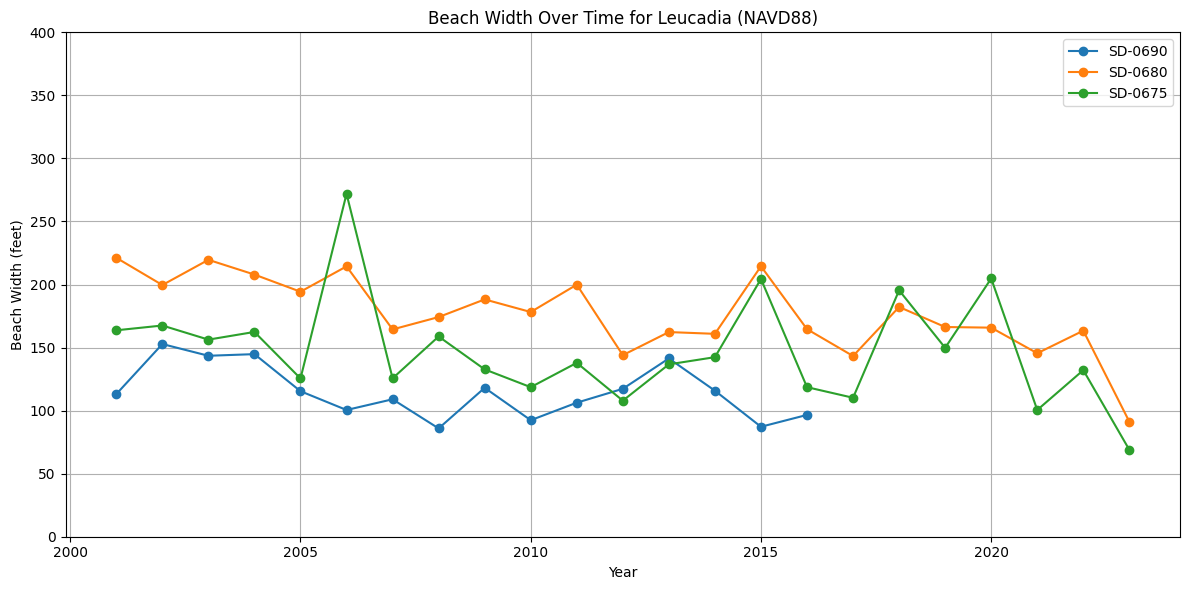

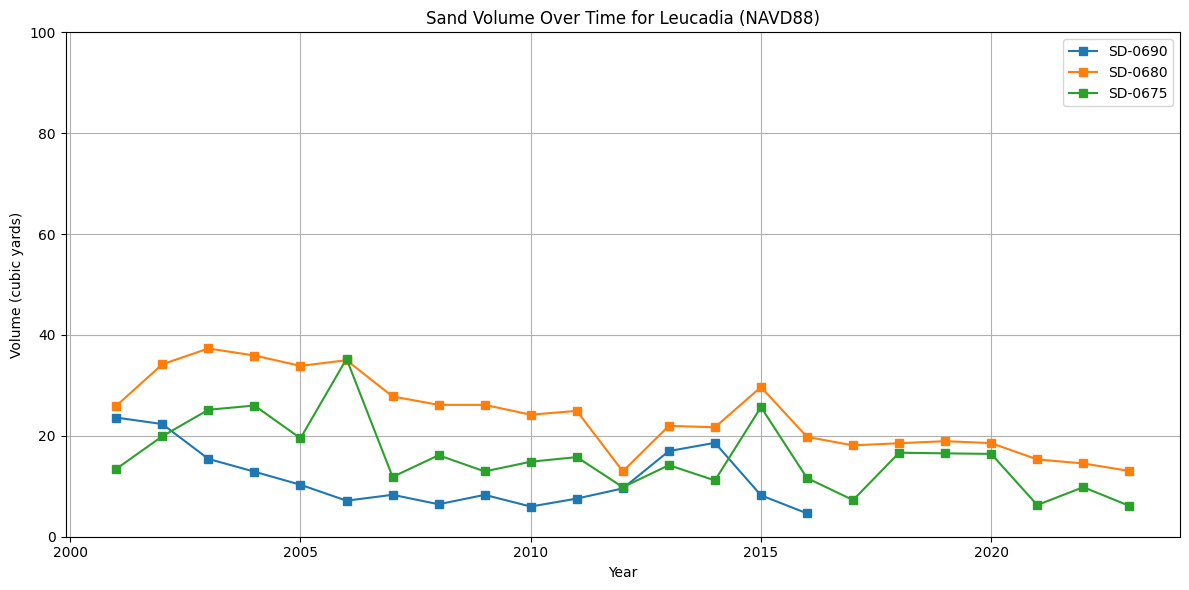

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume based on NAVD88
def process_bpd_file_navd(filename, navd_threshold=2.22):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out data below the NAVD88 threshold (2.22 feet)
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] > navd_threshold]

        # Adjust elevations to reference NAVD88 (not strictly necessary for volume but for interpretation)
        df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, NAVD88)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits the NAVD88 threshold
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= navd_threshold].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Define file lists for each transect
transect_files = {
    'SD-0690': ['06900110.bpd', '06900211.bpd', '06900310.bpd', '06900410.bpd', '06900510.bpd', '06900610.bpd', '06900710.bpd', '06900810.bpd', '06900910.bpd', '06901010.BPD', '06901110.bpd', '06901212.bpd', '06901310.bpd', '06901410.bpd', '06901510.bpd', '06901610.bpd'],
    'SD-0680': ['06800110.bpd','06800211.bpd', '06800310.bpd', '06800410.bpd', '06800510.bpd', '06800610.bpd', '06800710.bpd', '06800810.bpd', '06800910.bpd', '06801010.BPD', '06801110.bpd','06801212.bpd', '06801310.bpd', '06801410.bpd', '06801510.bpd', '06801610.bpd', '06801710.bpd', '06801810.bpd', '06801910.bpd', '06802010.bpd', '06802110.bpd', '06802210.bpd', '06802310.bpd'],
    'SD-0675': ['06750110.bpd', '06750211.bpd', '06750310.bpd', '06750410.bpd', '06750510.bpd', '06750610.bpd', '06750710.bpd', '06750810.bpd', '06750910.bpd', '06751010.BPD', '06751110.bpd', '06751212.bpd', '06751310.bpd', '06751410.bpd', '06751510.bpd', '06751610.bpd', '06751710.bpd', '06751810.bpd', '06751910.bpd', '06752010.bpd', '06752110.bpd', '06752210.bpd', '06752310.bpd']
}

# Custom names for the transects
transect_names = {
    'SD-0690': 'SD-0690',
    'SD-0680': 'SD-0680',
    'SD-0675': 'SD-0675'
}

# Process data for each transect
transect_data = {}

for transect, files in transect_files.items():
    data_list = []
    for year, filename in enumerate(files, start=2001):
        print(f"Processing file for year {year} in {transect}: {filename}")
        df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
        if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
            data_list.append((year, volume, beach_width, df, df_filtered))
            print(f"Year {year} ({transect}): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
        else:
            print(f"Skipping year {year} in {transect} due to error in file processing")
    
    # Create DataFrame from collected data
    transect_data[transect] = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Plotting the beach width over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', label=transect_names[transect])
plt.ylabel('Beach Width (feet)')
plt.ylim(0, 400)
plt.xlabel('Year')
plt.title('Beach Width Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the volume over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    plt.plot(data['Year'], data['Volume (cubic yards)'], marker='s', label=transect_names[transect])
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 100)
plt.xlabel('Year')
plt.title('Sand Volume Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


SD-0690: Slope = -2.07, Intercept = 4282.35, P-Value = 0.0664
Mean Beach Width = 115.01 feet, Standard Deviation = 20.37 feet

SD-0680: Slope = -3.28, Intercept = 6781.59, P-Value = 0.0001
Mean Beach Width = 176.78 feet, Standard Deviation = 30.08 feet

SD-0675: Slope = -1.80, Intercept = 3775.86, P-Value = 0.1848
Mean Beach Width = 147.50 feet, Standard Deviation = 41.73 feet



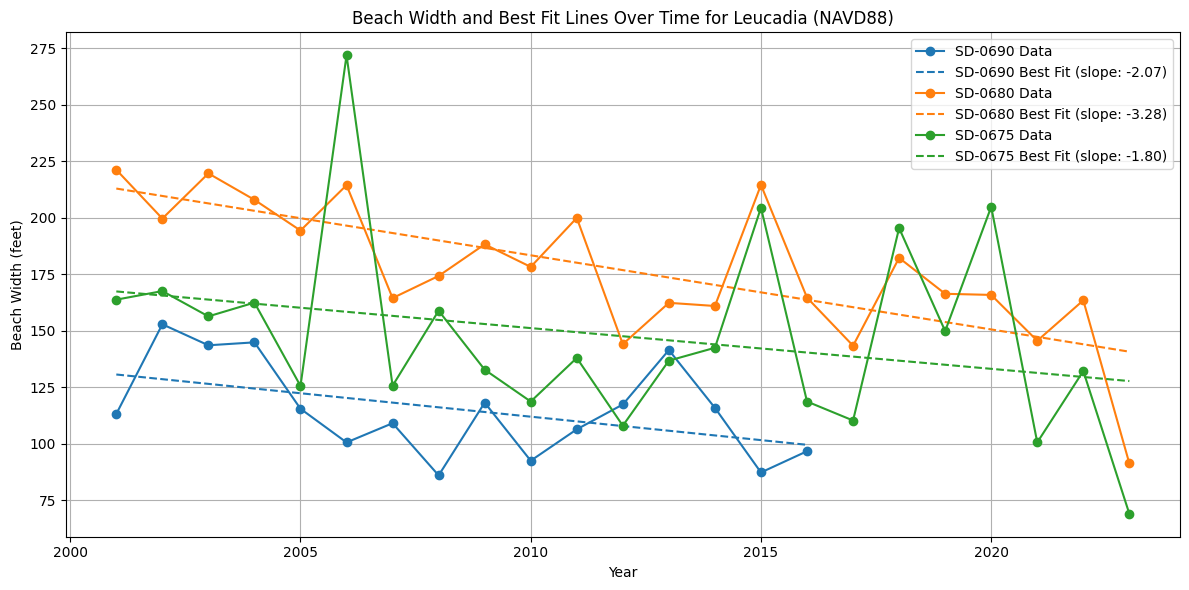

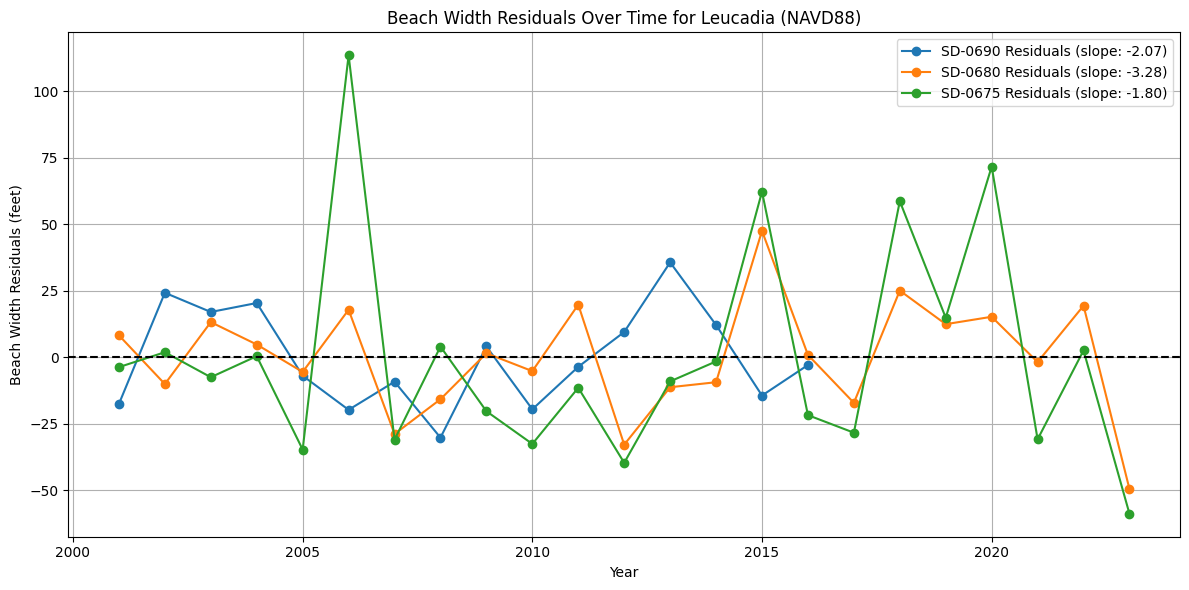

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, ttest_1samp

# Function to fit a line of best fit, calculate residuals, p-value, mean, and standard deviation
def analyze_transect_data(data):
    years = data['Year'].values
    widths = data['Beach Width (feet)'].values

    # Fit a line of best fit for beach width
    slope_width, intercept_width, r_value, p_value, std_err = linregress(years, widths)
    best_fit_width = slope_width * years + intercept_width
    residuals_width = widths - best_fit_width

    # Calculate mean and standard deviation of beach width
    mean_width = np.mean(widths)
    std_dev_width = np.std(widths)

    return residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width

# Initialize a dictionary to store analysis results for all transects
transect_analysis_results = {}

# Analyzing each transect
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    
    # Storing the results
    transect_analysis_results[transect] = {
        "Slope": slope_width,
        "Intercept": intercept_width,
        "P-Value": p_value,
        "Mean Beach Width": mean_width,
        "Standard Deviation": std_dev_width
    }

    # Displaying the results
    print(f"{transect_names[transect]}: Slope = {slope_width:.2f}, Intercept = {intercept_width:.2f}, P-Value = {p_value:.4f}")
    print(f"Mean Beach Width = {mean_width:.2f} feet, Standard Deviation = {std_dev_width:.2f} feet\n")

# Optional: Plotting the original beach width data and lines of best fit for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], data['Beach Width (feet)'], marker='o', linestyle='-', label=f"{transect_names[transect]} Data")
    plt.plot(data['Year'], best_fit_width, linestyle='--', color=plt.gca().lines[-1].get_color(), label=f"{transect_names[transect]} Best Fit (slope: {slope_width:.2f})")

plt.ylabel('Beach Width (feet)')
plt.xlabel('Year')
plt.title('Beach Width and Best Fit Lines Over Time for Leucadia (NAVD88)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the beach width residuals over time for all transects
plt.figure(figsize=(12, 6))
for transect, data in transect_data.items():
    residuals_width, best_fit_width, slope_width, intercept_width, p_value, mean_width, std_dev_width = analyze_transect_data(data)
    plt.plot(data['Year'], residuals_width, marker='o', label=f"{transect_names[transect]} Residuals (slope: {slope_width:.2f})")

plt.ylabel('Beach Width Residuals (feet)')
plt.xlabel('Year')
plt.title('Beach Width Residuals Over Time for Leucadia (NAVD88)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

